# Automated Fraud Detection MLOps Pipeline

***CI/CD-Driven Model Retraining with Flask, Kubernetes & Prometheus***

Build an end-to-end MLOps system that automates:

* Retraining a fraud detection model (Scikit-Learn) on new data using GitHub Actions.

* Serving predictions via a Flask API deployed on Kubernetes.

* Monitoring model performance and infrastructure health with Prometheus/Grafana.

What is MLOp? - https://www.databricks.com/glossary/mlops#:~:text=MLOps%20stands%20for%20Machine%20Learning,then%20maintaining%20and%20monitoring%20them

Credit Card Fraud Detection Dataset - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data?select=creditcard.csv 

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
# Set the random seed for reproducibility
random.seed(42)
np.random.seed(42)

In [6]:
# We will be using Random Forest

# Load the dataset
cc_fraud_df = pd.read_csv("datasets/creditcard.csv")

# Check
cc_fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


V1 to V28. PCA (Principal Component Analysis) has been applied to it. so we do not have much information about it. We know that the data is imbalanced as well. let's see how imbalanced it is

In [7]:
cc_fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


1 == Fraud, 0 == Not Fraud (Class column). I want to visualize it but i dont know which one exactly i will be visualizing. i want to do something like  the distribution of the features. but its 31 features so what. i can use histogram

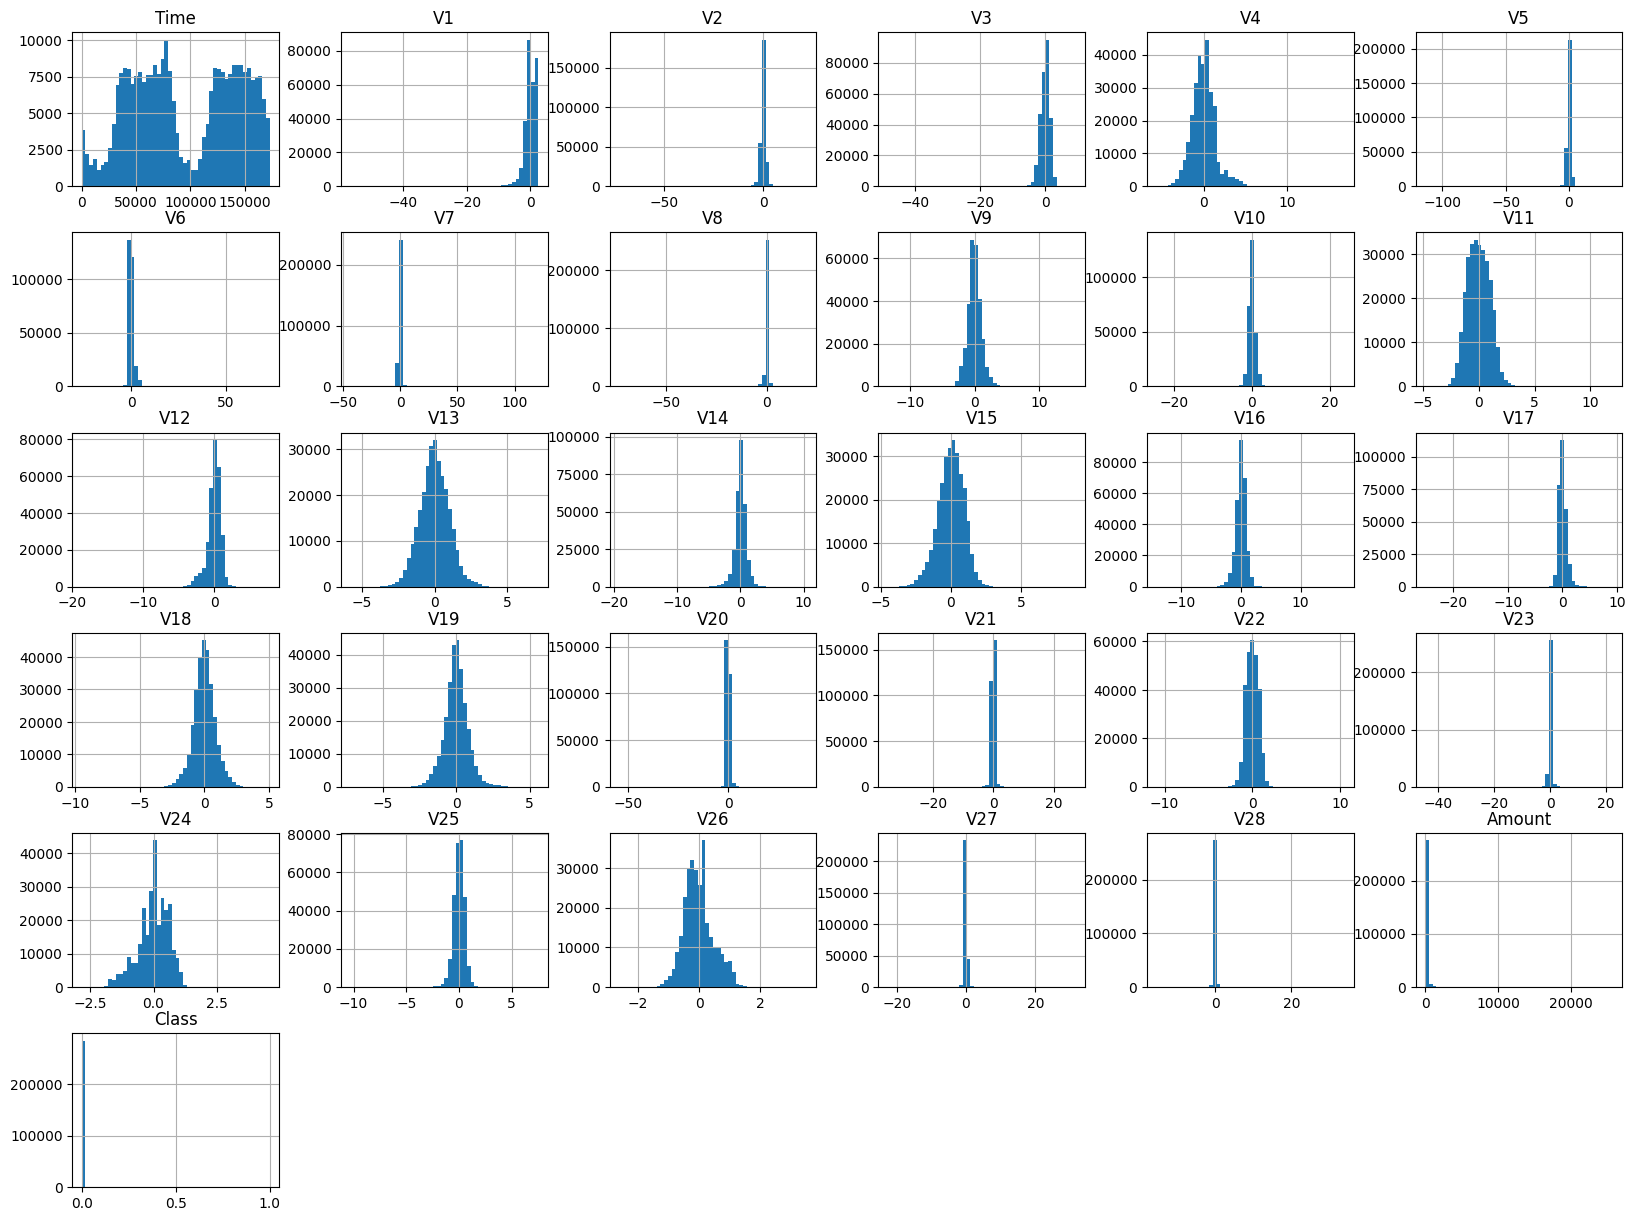

In [8]:
# Visualize the distribution in the dataset
cc_fraud_df.hist(bins=50, figsize=(20, 15))
plt.show()

I want to focus on the class, amount and time feature, so I will plot them individually to zoom in

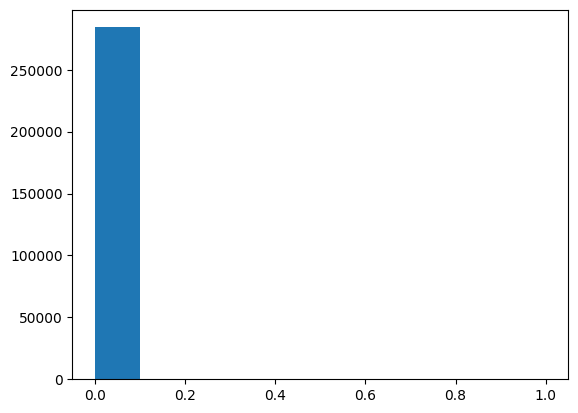

In [9]:
plt.hist(cc_fraud_df['Class'])
plt.show()

In [10]:
print(len(cc_fraud_df))

284807


it seems like there is no 1 at all. have i downloaded the right data? The description did say that there are less than 500 Fraud cases (1) so maybe its too small that it is not showing up. Which makes sense. The describe shows us that in the class, 0 is the average, in the 25th, 50th an 70th percentile so it is pretty large which makes sense. But let's get the actual number of them

In [13]:
# Count the number of 0s and 1s in class
count_fraud = cc_fraud_df['Class'].value_counts().get(1, 0)
print(f"Fraud occurs {count_fraud} times")

count_nonfraud = cc_fraud_df['Class'].value_counts().get(0, 0)
print(f"Non-Fraud occurs {count_nonfraud} times")

Fraud occurs 492 times
Non-Fraud occurs 284315 times


Okay so now we see that there is 1 but it is very small that is why it doesnt show up on the histogram. This also shows that the dataset is highly inbalanced. so we need to use an algorithm that works for inbalanced datasets. Thats by the way. let's check if there are any empty values in the dataset

In [14]:
# Check for missing values
cc_fraud_df.isnull().values.any()

np.False_

Yay none. what else do i have to check? i think thats it? oh the time column why do we need that? i guess it means something like the time it happens more? but let us begin

In [16]:
# Preprocessing
X = cc_fraud_df.drop(columns=['Class'])
y = cc_fraud_df['Class']

# check
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

I guess we have to scale x but now that we have v1 to v28 in PCA would that cause an issue? we will find out. anyway preprocessing would involve standard scaling the x um i think thats it?

More data exploration tasks:

1. Check if time affects when frauds happen
2. Check if 

In [20]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_scaled = std_scaler.fit_transform(X)

I mean I heard we could balance out the dataset, let's try it without it first and see if we need to do that.

Y is already in 0s and 1s i dont think we need to do any other thing to it

In [21]:
# Split into train, val and test
from sklearn.model_selection import train_test_split

# stratify=y, set stratified sampling to ensure that the splits are stratified since this is an imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, stratify=y_train, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

randomforest_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = [
    {
        'n_estimators': [100, 200, 300, 400, 500]
    }]

grid_search = GridSearchCV(randomforest_clf, param_grid=param_grid, scoring='roc_auc', n_jobs=-1)

# roc auc is better for inbalanced datasets

# fit
grid_search.fit(X_train, y_train)
        

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid=[{'n_estimators': [100, 200, 300, 400, 500]}],
             scoring='roc_auc')

In [24]:
print(grid_search.best_params_)

{'n_estimators': 500}


In [25]:
best_model = grid_search.best_estimator_

In [26]:
# Evaluate on validation data
from sklearn.metrics import roc_auc_score

y_pred_val = best_model.predict(X_val)

print("Validation ROC-AUC Score:", roc_auc_score(y_val, y_pred_val))

Validation ROC-AUC Score: 0.8717948717948718


In [29]:
from sklearn.metrics import precision_recall_curve, auc

# Get probabilities for the positive class (class 1)
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

# Calculate PR AUC
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc}")

PR AUC: 0.8048654905669371


Precision: [0.00171165 0.02327128 0.0620438  0.10596026 0.16931217 0.22068966
 0.27586207 0.32653061 0.34831461 0.3875     0.41891892 0.46268657
 0.50819672 0.54385965 0.58490566 0.59615385 0.64583333 0.65957447
 0.67391304 0.68888889 0.70454545 0.72093023 0.73809524 0.775
 0.79487179 0.81578947 0.83783784 0.86111111 0.88571429 0.88235294
 0.90909091 0.90625    0.93548387 0.96666667 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
Recall: [1.         0.8974359  0.87179487 0.82051282 0.82051282 0.82051282
 0.82051282 0.82051282 0.79487179 0.79487179 0.79487179 0.79487179
 0.79487179 0.79487179 0.79487179 0.79487179 0.79487179 0.79487179
 0.79487179 0.79487179 0.79487179 0.79487179 0.79487179 0.79487179
 0.79487179 0.79487179 0.79487179 0.79487179 0.794871

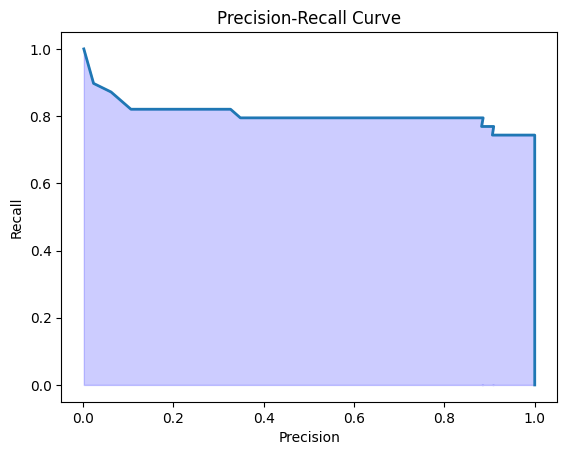

In [37]:
plt.plot(precision, recall, linewidth=2)
plt.fill_between(precision, recall, color="blue", alpha=0.2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision-Recall Curve")
plt.show()

In [39]:
from sklearn.metrics import precision_score, recall_score
print("Validation Precision:", precision_score(y_val, y_pred_val))
print("Validation Recall Score:", recall_score(y_val, y_pred_val))

Validation Precision: 1.0
Validation Recall Score: 0.7435897435897436


So right now, precision shows that anytime it classifies a trasaction as fraud it is actually fraud, but because it is very precise 1.0 on that, it doesn't catch some of the other transactions. i dont know, I could reduce the threshold but since it is a finance case if the precision is low and it mistakenly classifies a case as fraud...would that be so bad? i mean in essence it not catching 28% of actual fraud activities mean that they are not reported and that could be a problem. so it would be better to risk precision but ensure that more fraud activities are actually caught.  So goal is to increase Recall

In [42]:
# By default threshold is usually set to 0.5 let's reduce it a bit to catch more fraud
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int) # Convert probabilities to class labels

In [43]:
# Calculate Precision and Recall with the adjusted threshold
precision = precision_score(y_val, y_pred_adjusted)
recall = recall_score(y_val, y_pred_adjusted)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.8857142857142857
Recall: 0.7948717948717948


Okay this is more balanced, but we are loosing precision, which is the tradeoff we have to make here to be able to catch more fraud. Good enough for me! Let's test

In [44]:
# Predict probabilities on the test set
y_prob_test = best_model.predict_proba(X_test)[:, 1]

# Adjust the threshold to 0.3
y_pred_adjusted_test = (y_prob_test >= threshold).astype(int)


In [45]:
# Evaluate
precision = precision_score(y_test, y_pred_adjusted_test)
recall = recall_score(y_test, y_pred_adjusted_test)

print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")

Test Precision: 0.9318181818181818
Test Recall: 0.8367346938775511


Slayyyy!